# Run ML algorithms

In [2]:
# Import Stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer, CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, ConfusionMatrixDisplay

from hpsklearn import HyperoptEstimator



In [4]:
pheme = pd.read_csv('datasets\pheme.csv')
politifact = pd.read_csv('datasets\politifact.csv')
twitter = pd.read_csv('datasets\\twitter.csv')

In [21]:
politifact.head()

,Unnamed: 0,verdict,statement_originator,statement,statement_date,statement_source,factchecker,factcheck_date,factcheck_analysis_link
0,0,True,Barack Obama,john mccain opposed bankruptcy protections for...,6/11/2008,speech,Adriel Bettelheim,6/16/2008,https://www.politifact.com/factchecks/2008/jun...
1,1,False,Matt Gaetz,bennie thompson actively cheer led riots in t...,6/7/2022,television,Yacob Reyes,6/13/2022,https://www.politifact.com/factchecks/2022/jun...
2,2,True,Kelly Ayotte,says maggie hassan was out of state on day...,5/18/2016,news,Clay Wirestone,5/27/2016,https://www.politifact.com/factchecks/2016/may...
3,3,False,Bloggers,busted cdc inflated covid numbers accused o...,2/1/2021,blog,Madison Czopek,2/5/2021,https://www.politifact.com/factchecks/2021/feb...
4,4,True,Bobby Jindal,i am the only republican candidate that has...,8/30/2015,television,Linda Qiu,8/30/2015,https://www.politifact.com/factchecks/2015/aug...


In [10]:

def encode_two_datasets(set1, set2):
    tfidf = TfidfVectorizer(max_df=0.6, min_df=0)
    all_statements = np.append(set1, set2)
    all_tf = tfidf.fit_transform(all_statements)
    return all_tf[:len(set1)], all_tf[len(set1):]

In [11]:
rs = 42
method = 3
tfidf = TfidfVectorizer(max_df=0.6, min_df=0)

if method == 0:
    pheme_tf = tfidf.fit_transform(pheme['text'].values)
    X_train, X_test, y_train, y_test = train_test_split(pheme_tf, pheme['target'], test_size = 0.25, random_state = rs)
elif method == 1:
    polit_tf = tfidf.fit_transform(politifact['statement'].values)
    X_train, X_test, y_train, y_test = train_test_split(polit_tf, politifact['verdict'], test_size = 0.25, random_state = rs)
elif method == 2:
    twitter_tf = tfidf.fit_transform(twitter['text'].values)
    X_train, X_test, y_train, y_test = train_test_split(twitter_tf, twitter['verdict'], test_size = 0.25, random_state = rs)
elif method == 3:
    X_train, X_test = encode_two_datasets(twitter['text'].values, pheme['text'].values)
    y_test = pheme['target']
    y_train = twitter['verdict']
else:
    X_train, X_test = encode_two_datasets(politifact['statement'].values, pheme['text'].values)
    y_train = politifact['verdict']
    y_test = pheme['target']
    

# Set no. of folds
num_folds = 10

###Things to do: add more features
print(X_train.shape)

(1729, 6101)


In [24]:
# Model running function
def run_model_after_gridsearch(best_estimators, X_train, y_train, X_test, y_test):
    mod = best_estimators
    mod.fit(X_train, y_train)
    pred_y = mod.predict(X_test)
    acc_mod = accuracy_score(y_test, pred_y)
    print("Accuracy:", float("{0:.2f}".format(acc_mod*100)), "%")
    f1_mod = f1_score(y_test, pred_y, average="macro")
    print("F1:", float("{0:.2f}".format(f1_mod*100)), "%")
    cm = confusion_matrix(y_test, pred_y)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["true", "false"])
    disp.plot()
    plt.show()  

In [25]:
def run_model_manually(model, X_test, y_test):
    pred_y = model.predict(X_test)
    acc_mod = accuracy_score(y_test, pred_y)
    print("Accuracy:", float("{0:.2f}".format(acc_mod*100)), "%")
    f1_mod = f1_score(y_test, pred_y, average="macro")
    print("F1:", float("{0:.2f}".format(f1_mod*100)), "%")
    cm = confusion_matrix(y_test, pred_y)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["true", "false"])
    disp.plot()
    plt.show() 

In [12]:
def optimize_model(model, X_train, y_train):
    mod = HyperoptEstimator(classifier=model,
                            preprocessing=[],
                            max_evals=50)
    mod.fit(X_train, y_train)
    print(mod.best_model())
    return mod

def evaluate_model(model, X_test, y_test):
    pred_y = model.predict(X_test)
    acc_mod = accuracy_score(y_test, pred_y)
    print("Accuracy:", float("{0:.2f}".format(acc_mod*100)), "%")
    f1_mod = f1_score(y_test, pred_y, average="macro")
    print("F1:", float("{0:.2f}".format(f1_mod*100)), "%")
    cm = confusion_matrix(y_test, pred_y)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["true", "false"])
    disp.plot()
    plt.show() 
    

In [17]:
# SVM
from hpsklearn import svc 
svm = optimize_model(svc("mySVC"), X_train, y_train)

100%|██████████| 50/50 [00:01<00:00,  1.83s/trial, best loss: 0.15317919075144504]
{'learner': SVC(C=1.3204682968065102, coef0=0.98432645082777, decision_function_shape='ovo',
    degree=2, kernel='linear', random_state=0, shrinking=False,
    tol=0.00027730553875988923), 'preprocs': (), 'ex_preprocs': ()}


Accuracy: 75.44 %
F1: 75.39 %


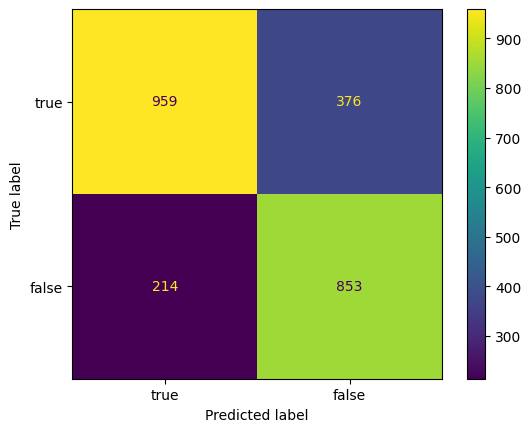

In [18]:
evaluate_model(svm, X_test, y_test)

In [19]:
# KNN
from hpsklearn import k_neighbors_classifier
from hyperopt import hp
knn_metrics = hp.choice("metric", {'cityblock', 'l1', 'l2', 'euclidean', 'manhattan'})
knn= optimize_model(k_neighbors_classifier("myKNN", metric=knn_metrics), X_train, y_train)

100%|██████████| 50/50 [00:01<00:00,  1.77s/trial, best loss: 0.12716763005780352]
{'learner': KNeighborsClassifier(algorithm='brute', leaf_size=39, metric='euclidean',
                     n_jobs=1, n_neighbors=1, p=1.9251003009021361), 'preprocs': (), 'ex_preprocs': ()}


Accuracy: 70.61 %
F1: 70.52 %


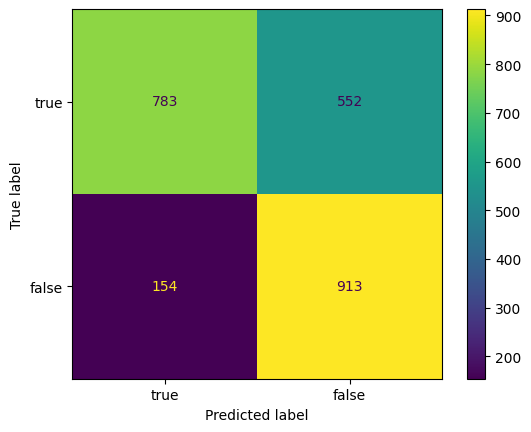

In [20]:
evaluate_model(knn, X_test, y_test)

In [21]:
# Logistic Regression logistic_regression
from hpsklearn import logistic_regression
myLR = optimize_model(logistic_regression("myLR"), X_train, y_train)

100%|██████████| 50/50 [00:01<00:00,  1.78s/trial, best loss: 0.19075144508670516]
{'learner': LogisticRegression(C=1.7031308778204772, max_iter=541, n_jobs=1, penalty='l1',
                   random_state=4, solver='liblinear',
                   tol=0.0032949736591728774), 'preprocs': (), 'ex_preprocs': ()}


Accuracy: 70.57 %
F1: 69.93 %


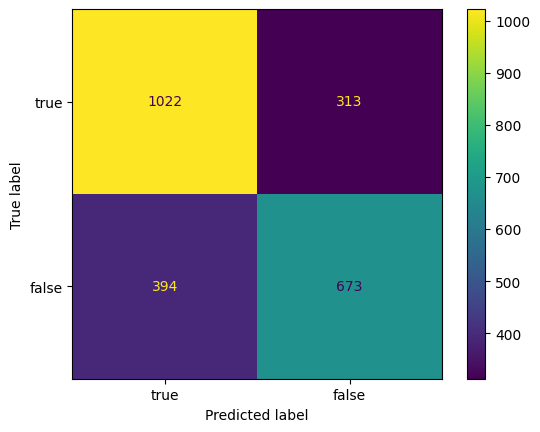

In [22]:
evaluate_model(myLR, X_test, y_test)

In [23]:
# AdaBoost
from hpsklearn import ada_boost_classifier, decision_tree_classifier
baseDT = decision_tree_classifier("adaDT")
ada = optimize_model(ada_boost_classifier("myada", base_estimator=baseDT), X_train, y_train)

100%|██████████| 50/50 [00:01<00:00,  1.69s/trial, best loss: 0.12138728323699421]


c:\Users\willc\miniconda3\envs\test\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


{'learner': AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_features=0.9346716798410857,
                                                         random_state=1),
                   learning_rate=0.022153770294421088, n_estimators=453,
                   random_state=1), 'preprocs': (), 'ex_preprocs': ()}


Accuracy: 67.94 %
F1: 67.93 %


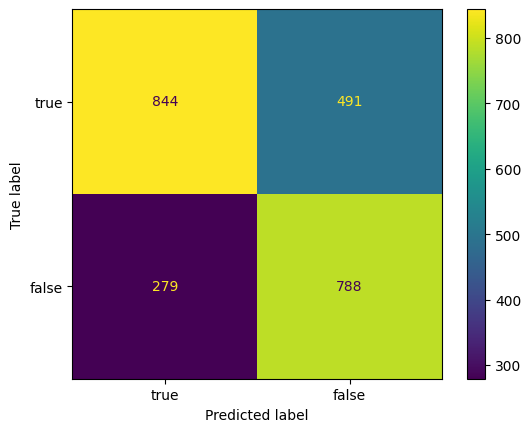

In [24]:
# Run model with best results
evaluate_model(ada, X_test, y_test)

In [25]:
from hpsklearn import mlp_classifier

mlp = optimize_model(mlp_classifier("mlp"), X_train, y_train)

100%|██████████| 50/50 [00:14<00:00, 14.25s/trial, best loss: 0.11560693641618502]
{'learner': MLPClassifier(alpha=0.00434318960406697, beta_1=0.9630058598863803,
              beta_2=0.9552503178738572, epsilon=3.630668804110263e-06,
              learning_rate_init=0.08806364095197329, max_fun=17751,
              max_iter=323, momentum=0.9819445224655227, n_iter_no_change=20,
              power_t=0.7782601820352194, random_state=1,
              tol=0.0006558120161955776,
              validation_fraction=0.09434240839354989), 'preprocs': (), 'ex_preprocs': ()}


Accuracy: 68.69 %
F1: 68.68 %


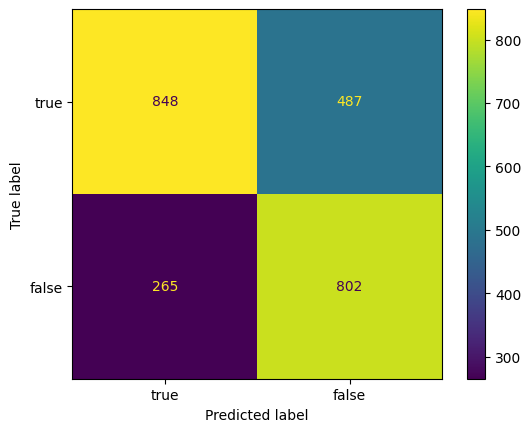

In [26]:
evaluate_model(mlp, X_test, y_test)